<a href="https://colab.research.google.com/github/ikwak2/APCP/blob/master/age_d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
system("gdown --id 1OiE1SD_c4GP4fY7GCLPB8BZYHs1pm34f")
data = read.csv("children.csv")
system("gdown --id 15XaXV5ud8uvI4GKPvc3r2WrwiEk33Wvw")
data2 = read.csv("adult.csv")
system("gdown --id 19G2n-Y2cQYO_yrLgPj56YgnzJ3Ujw8ar")
data3 = read.csv("all_d.csv")
system("gdown --id 1_9krkM5u3tqYrxGHIc7uspEUxbiVXcUs")
age_d = read.csv("age_d.csv")


## 코피변수 연령효과 관련 시각화

1. Age_d.csv 데이터 정리
2. 정리 후 월별 환자 수 데이터 시각화

In [1]:
library(tidyverse)


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [4]:
age_d<-na.omit(age_d)
str(age_d)
head(age_d)
summary(age_d)

'data.frame':	2273 obs. of  4 variables:
 $ date : chr  "2016-01-01" "2016-01-02" "2016-01-02" "2016-01-03" ...
 $ year : int  2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 ...
 $ month: chr  "JAN" "JAN" "JAN" "JAN" ...
 $ age  : int  74 60 22 56 22 69 68 15 20 64 ...


,date,year,month,age
,<chr>,<int>,<chr>,<int>
1,2016-01-01,2016,JAN,74
2,2016-01-02,2016,JAN,60
3,2016-01-02,2016,JAN,22
4,2016-01-03,2016,JAN,56
5,2016-01-03,2016,JAN,22
6,2016-01-04,2016,JAN,69


     date                year         month                age       
 Length:2273        Min.   :2015   Length:2273        Min.   : 0.00  
 Class :character   1st Qu.:2016   Class :character   1st Qu.: 0.00  
 Mode  :character   Median :2017   Mode  :character   Median :24.00  
                    Mean   :2017                      Mean   :30.75  
                    3rd Qu.:2018                      3rd Qu.:59.00  
                    Max.   :2019                      Max.   :94.00  

## 10살별로 연령 구분

In [5]:
age_d <- transform(age_d,  age_group = ifelse(age < 10, "<10", 
  ifelse(age >= 10 & age < 20, "10-19",
  ifelse(age >= 20 & age < 30, "20-29",
  ifelse(age >= 30 & age < 40, "30-39",
  ifelse(age >= 40 & age < 50, "40-49", 
  ifelse(age >= 50 & age < 60, "50-59",
  ifelse(age >= 60 & age < 70, "60-69",
  ifelse(age >= 70 & age < 80, "70-79",
  ifelse(age >= 80 & age < 90, "80-89", "90 over"  ))))))))))


## 월별 코피환자 수 시각화

10세 이하에서 분포가 다른 것 같아보임..

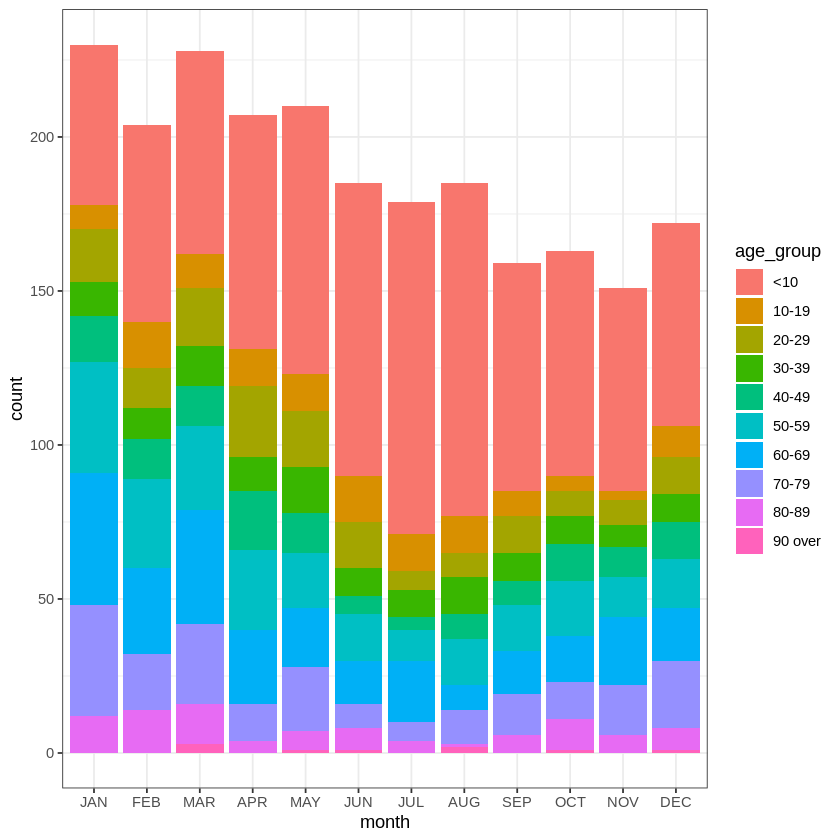

In [6]:
ggplot(data=age_d,aes(x=month, fill=age_group))+ 
  theme_bw() + scale_x_discrete(limits=c("JAN","FEB","MAR", "APR", "MAY", "JUN","JUL", "AUG", "SEP", "OCT", "NOV", "DEC")) + geom_bar()

확연히 달라보이지만 연령층이 너무 많아서 관계 파악이 잘 안됨


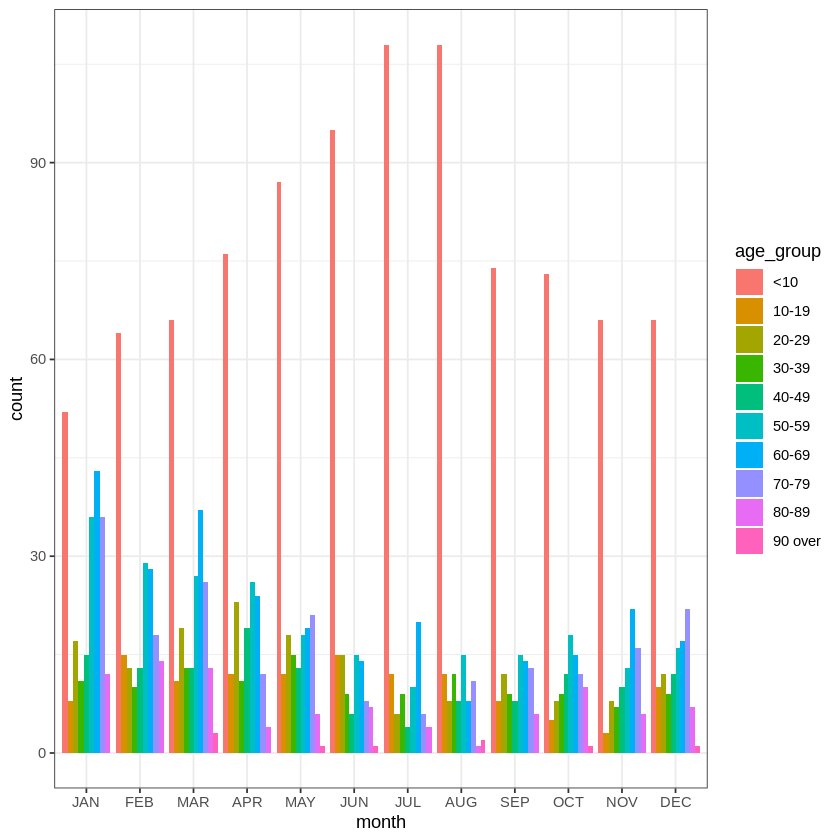

In [10]:
ggplot(data=age_d,aes(x=month, fill=age_group))+ 
  theme_bw() + scale_x_discrete(limits=c("JAN","FEB","MAR", "APR", "MAY", "JUN","JUL", "AUG", "SEP", "OCT", "NOV", "DEC")) + geom_bar(position = 'dodge')

10세 이하의 패턴은 확연히 다름

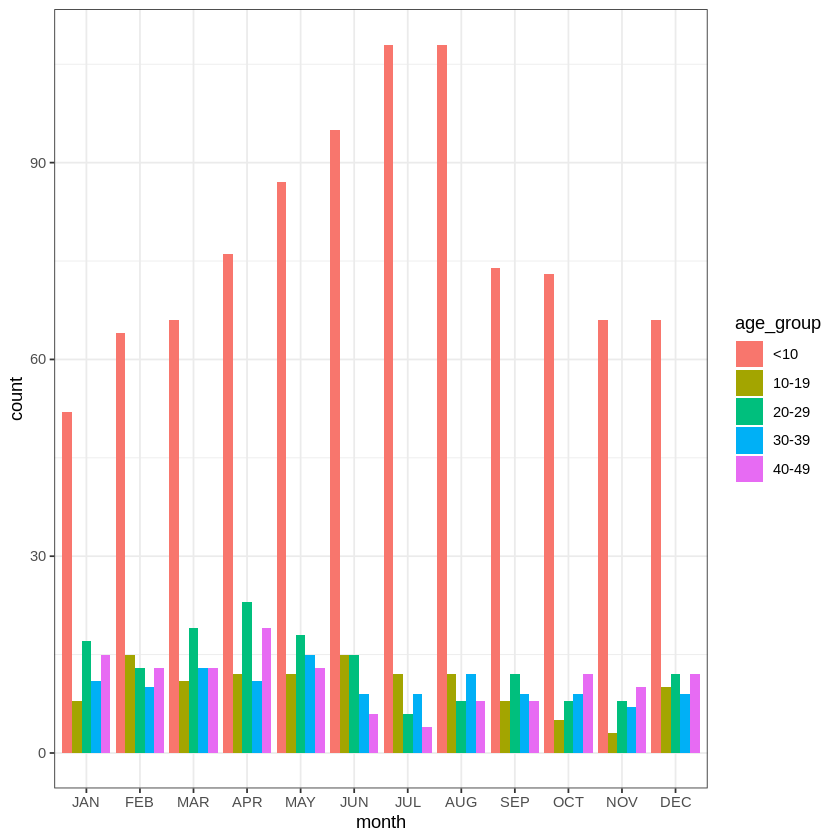

In [13]:
age_d %>% filter(age_group %in% c("<10", "10-19", "20-29", "30-39","40-49")) %>%
ggplot(aes(x=month, fill=age_group))+ 
  theme_bw() + scale_x_discrete(limits=c("JAN","FEB","MAR", "APR", "MAY", "JUN","JUL", "AUG", "SEP", "OCT", "NOV", "DEC")) + geom_bar(position = 'dodge')

50세 이상 어른들의 패턴은 유사해보임

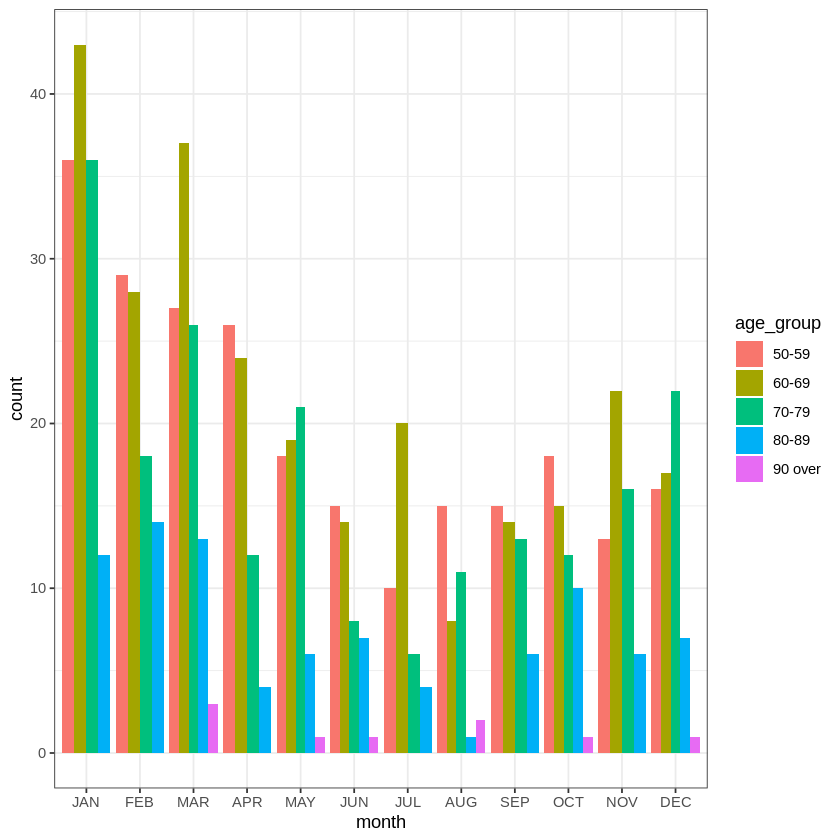

In [14]:
age_d %>% filter(!(age_group %in% c("<10", "10-19", "20-29", "30-39","40-49") )) %>%
ggplot(aes(x=month, fill=age_group))+ 
  theme_bw() + scale_x_discrete(limits=c("JAN","FEB","MAR", "APR", "MAY", "JUN","JUL", "AUG", "SEP", "OCT", "NOV", "DEC")) + geom_bar(position = 'dodge')

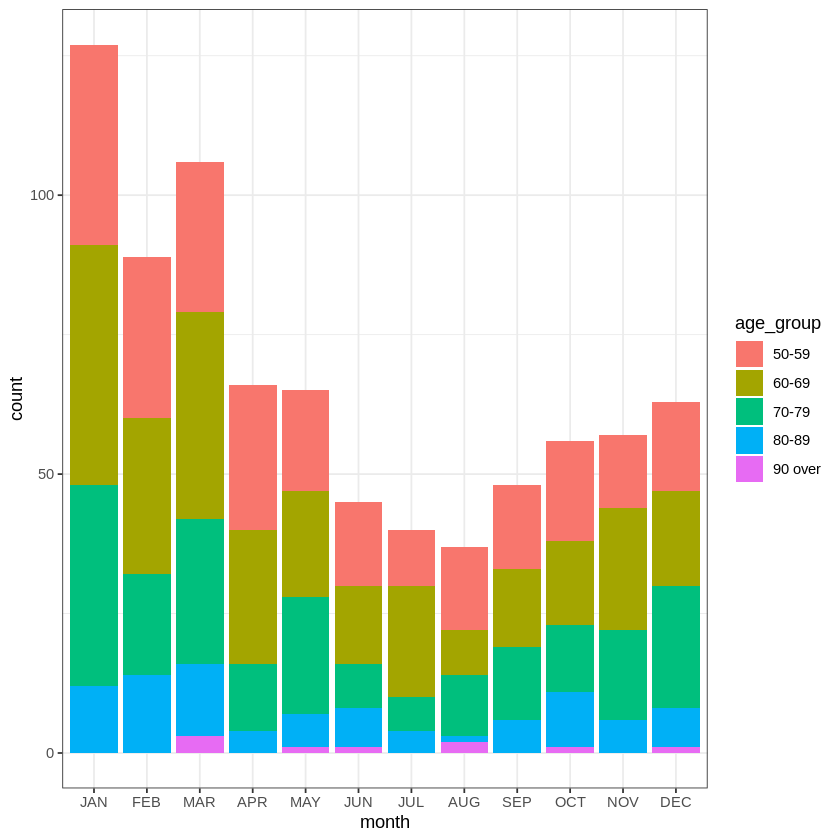

In [17]:
age_d %>% filter(!(age_group %in% c("<10", "10-19", "20-29", "30-39","40-49") )) %>%
ggplot(aes(x=month, fill=age_group))+ 
  theme_bw() + scale_x_discrete(limits=c("JAN","FEB","MAR", "APR", "MAY", "JUN","JUL", "AUG", "SEP", "OCT", "NOV", "DEC")) + geom_bar()

10~50 세 연령층의 패턴

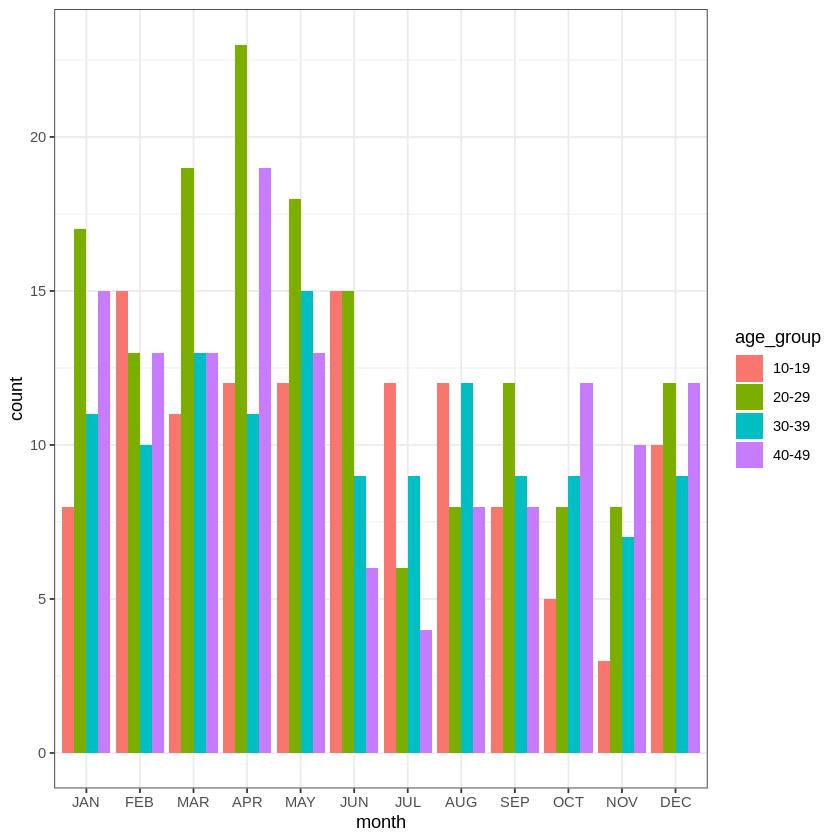

In [15]:
age_d %>% filter(age_group %in% c("10-19", "20-29", "30-39","40-49")) %>%
ggplot(aes(x=month, fill=age_group))+ 
  theme_bw() + scale_x_discrete(limits=c("JAN","FEB","MAR", "APR", "MAY", "JUN","JUL", "AUG", "SEP", "OCT", "NOV", "DEC")) + geom_bar(position = 'dodge')

50세 이상 연령층과 다른 패턴이 확인됨

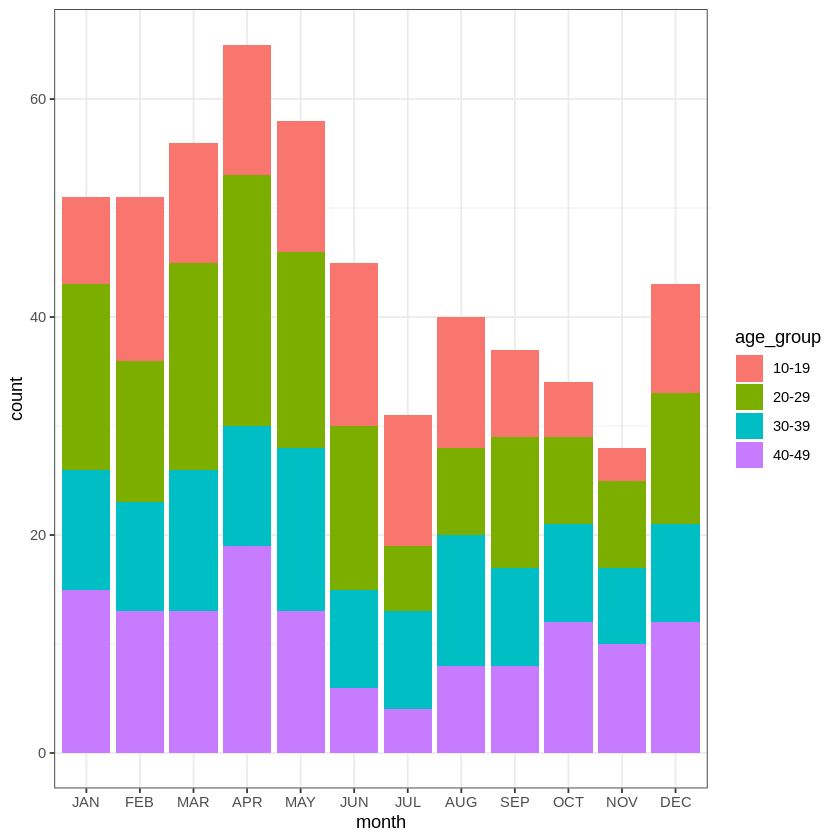

In [16]:
age_d %>% filter(age_group %in% c("10-19", "20-29", "30-39","40-49")) %>%
ggplot(aes(x=month, fill=age_group))+ 
  theme_bw() + scale_x_discrete(limits=c("JAN","FEB","MAR", "APR", "MAY", "JUN","JUL", "AUG", "SEP", "OCT", "NOV", "DEC")) + geom_bar()

## 연도별 시각화 

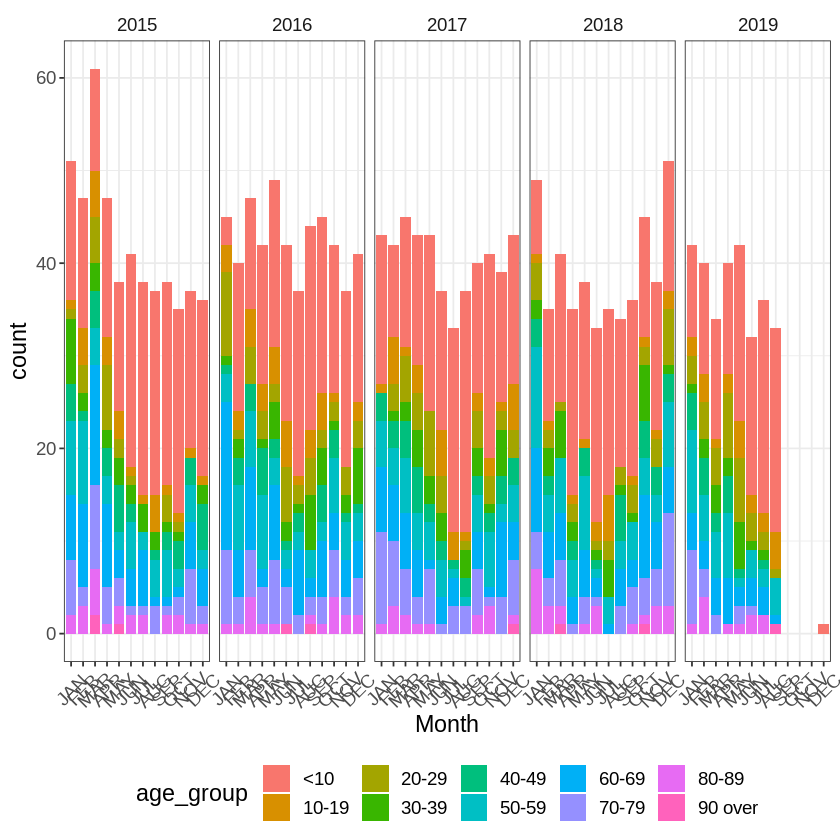

In [7]:
ggplot(data = age_d) + 
  geom_bar(mapping = aes(x = month, fill = age_group) ) + facet_grid(~year)  + 
  theme_bw() + scale_x_discrete(limits=c("JAN","FEB","MAR", "APR", "MAY", "JUN","JUL", "AUG", "SEP", "OCT", "NOV", "DEC")) +
    theme(axis.line = element_blank(),
#          panel.grid.major = element_blank(),
          panel.background = element_blank(),
          strip.background = element_blank(),
          axis.text.x = element_text(angle= 45, vjust = .5)) +
#          axis.text.y = element_blank() +
    theme(legend.position = "bottom", text = element_text(size = 14), plot.title = element_text(hjust = 0.5, size = 20) ) +
    xlab('Month')
  
  

## 연도별 10세 이하 

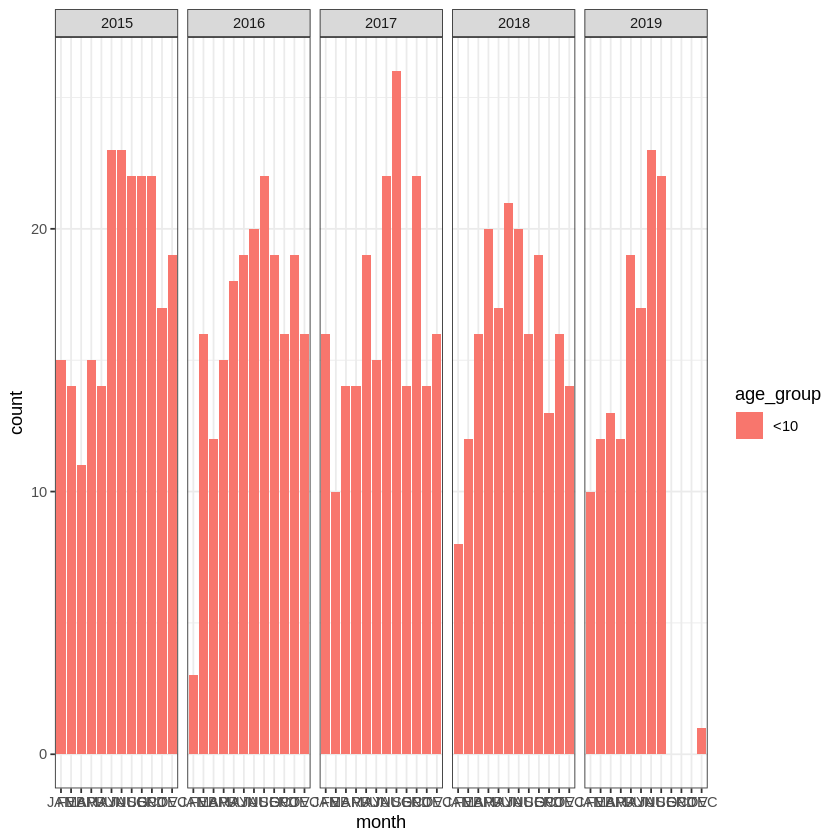

In [8]:
age_d %>% filter(age_group == "<10") %>% ggplot(aes(x = month, fill = age_group)) + geom_bar() + facet_grid(~year)  + 
  theme_bw() + scale_x_discrete(limits=c("JAN","FEB","MAR", "APR", "MAY", "JUN","JUL", "AUG", "SEP", "OCT", "NOV", "DEC"))

## 연도별, 10세 이상

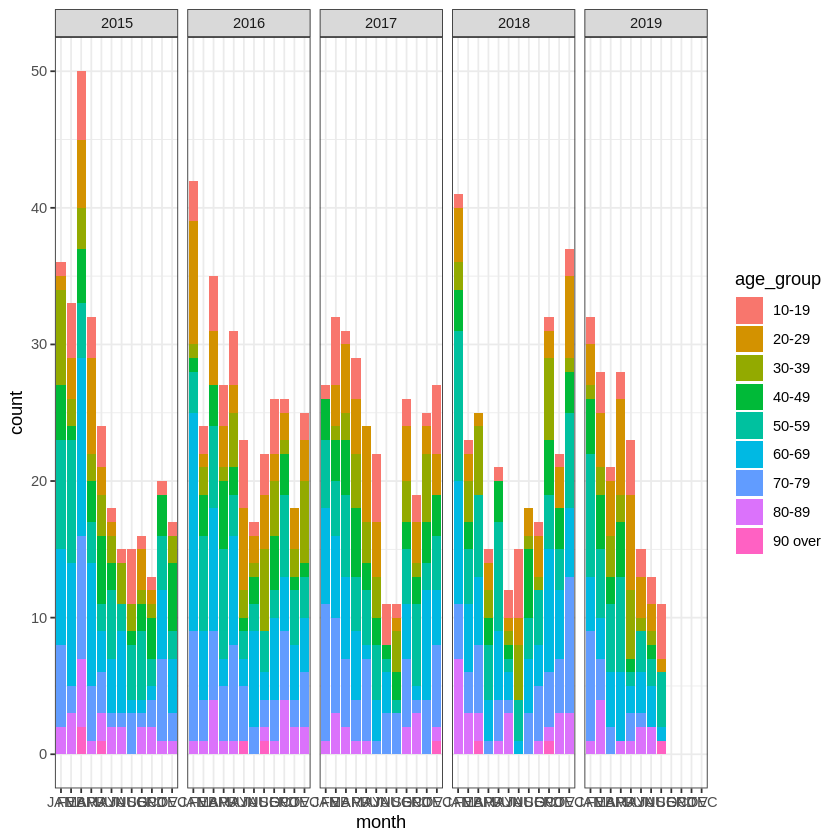

In [9]:
age_d %>% filter(age_group != "<10") %>% ggplot(aes(x = month, fill = age_group)) + geom_bar() + facet_grid(~year)  + 
  theme_bw() + scale_x_discrete(limits=c("JAN","FEB","MAR", "APR", "MAY", "JUN","JUL", "AUG", "SEP", "OCT", "NOV", "DEC"))